### Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

##Importing Libraries

In [ ]:
##Dataset Link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data
import pandas as pd
import numpy as np
import seaborn as sns

##Loading the dataset

In [ ]:
df=pd.read_csv('/content/BankNote_Authentication.csv')

##EDA(Exploratory data analysis)

In [ ]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


check for missing values

In [ ]:
print(df.isnull().sum())

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


Check the balance of the classes

<Axes: xlabel='class', ylabel='count'>

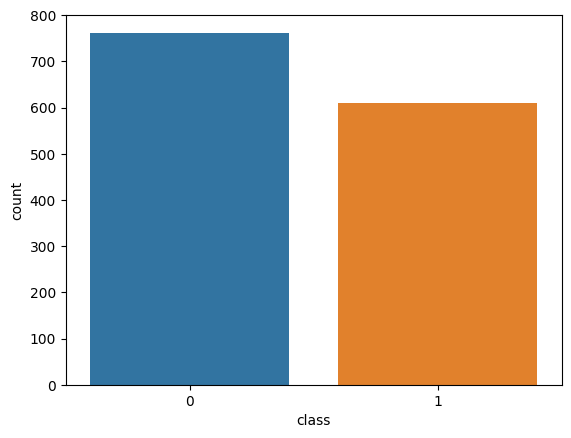

In [ ]:
sns.countplot(x='class', data=df)

# Visualize the distributions of the features

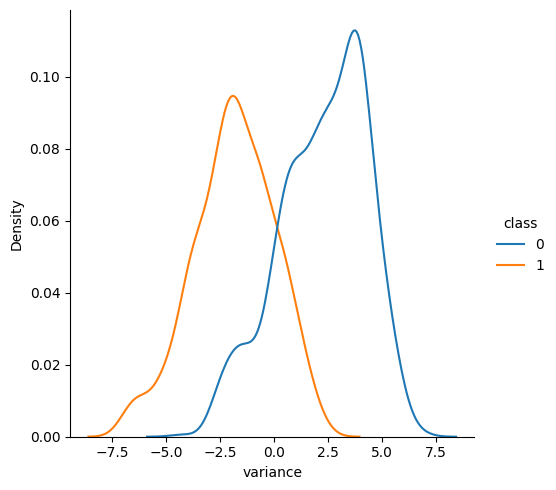

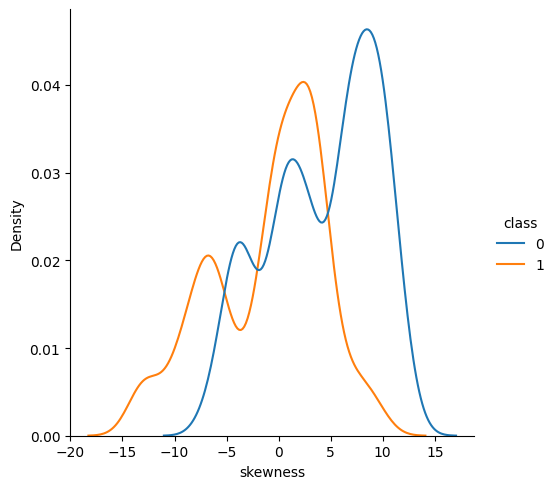

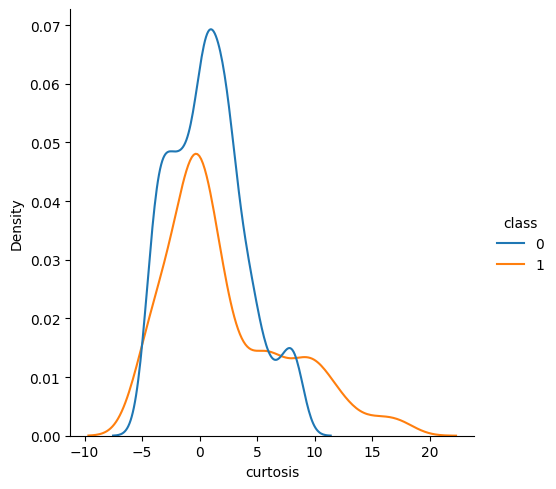

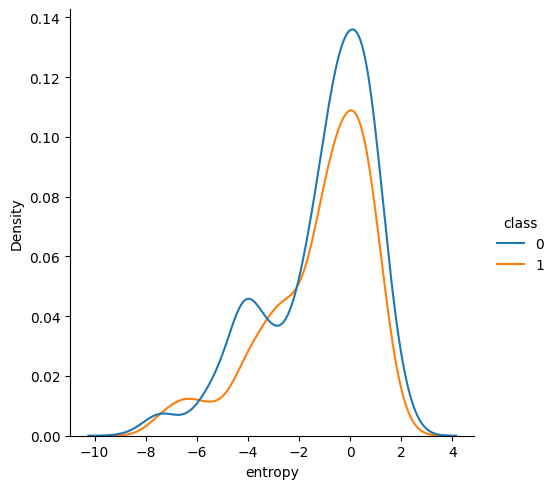

In [ ]:
sns.displot(df, x='variance', hue='class', kind='kde')
sns.displot(df, x='skewness', hue='class', kind='kde')
sns.displot(df, x='curtosis', hue='class', kind='kde')
sns.displot(df, x='entropy', hue='class', kind='kde')

 Check for correlations between the features

<Axes: >

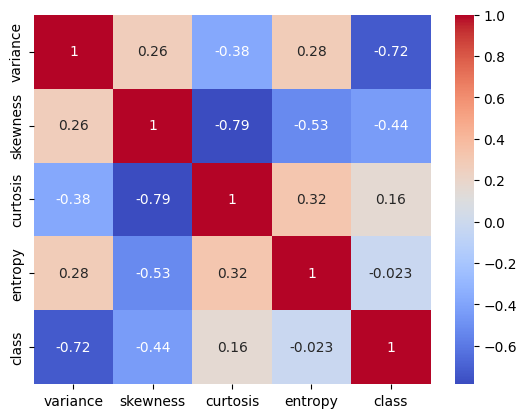

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
 ### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: class, dtype: int64

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

##implementation of training and testing a Naive Bayes classifier from scratch without using scikit-learn:

In [ ]:
# Implement Naive Bayes classifier
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = np.zeros((len(self.classes), X.shape[1]))
        self.var = np.zeros((len(self.classes), X.shape[1]))

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i, :] = X_c.mean(axis=0)
            self.var[i, :] = X_c.var(axis=0)

    def predict(self, X):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = np.log(len(X[y == c]) / len(X))
            likelihood = np.sum(np.log(self.pdf(X, i)), axis=1)
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors, axis=0)]

    def pdf(self, X, class_idx):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-((X - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [ ]:
# Train and test the Naive Bayes classifier
nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.837378640776699


<ipython-input-40-3e0f6923d1b1>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prior = np.log(len(X[y == c]) / len(X))


In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Difference: ", train_accuracy - test_accuracy)

Training Accuracy:  0.840625
Test Accuracy:  0.837378640776699
Difference:  0.0032463592233009653


In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Confusion Matrix:\n", cm)

Accuracy:  0.837378640776699
Precision:  0.8265895953757225
Recall:  0.7944444444444444
F1 Score:  0.810198300283286
Confusion Matrix:
 [[202  30]
 [ 37 143]]


##Hyper parameter tuning

In [ ]:
# Define hyperparameters to tune
alpha_values = [0.1, 0.5, 1, 2, 5, 10]

# Perform grid search over hyperparameters
best_alpha = None
best_accuracy = 0
for alpha in alpha_values:
    # Train the model with current hyperparameter value
    nb = NaiveBayes(alpha)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)

    # Evaluate the model with current hyperparameter value
    accuracy = np.mean(y_pred == y_test)

    # Update best hyperparameters if current model is better
    if accuracy > best_accuracy:
        best_alpha = alpha
        best_accuracy = accuracy

print("Best alpha: ", best_alpha)
print("Best accuracy: ", best_accuracy)

Best alpha:  2
Best accuracy:  0.8398058252427184


<ipython-input-54-0d914ce88e85>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prior = np.log(len(X[y == c]) / len(X))
<ipython-input-54-0d914ce88e85>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prior = np.log(len(X[y == c]) / len(X))
<ipython-input-54-0d914ce88e85>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prior = np.log(len(X[y == c]) / len(X))
<ipython-input-54-0d914ce88e85>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prior = np.log(len(X[y == c]) / len(X))
<ipython-input-54-0d914ce88e85>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prior = np.log(len(X[y == c]) / len(X))
<ipython-input-54-0d914ce88e85>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prior = np.log(len(X[y == c]) / len(X))


In [ ]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [ ]:
import numpy as np

In [ ]:
classifier.predict([[2,3,4,1]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])